# Imports

In [1]:
from sklearn.datasets import load_digits
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from typing import Generator
import pickle as pkl

# Load and Plot

<Figure size 640x480 with 0 Axes>

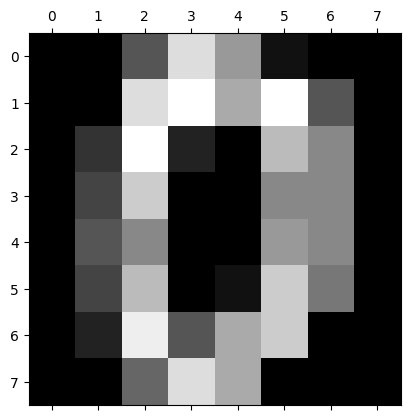

In [2]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])

plt.show()

# Preprocess Data

In [3]:
# reshape images from (8,8) to (64)
digits.images = [image.reshape((64)) for image in digits.images]

In [4]:
digits.images[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
# Norm the greyscale to values between 0 and 1 with factor 1/16 because the max value is 16 (why?) 
digits.images = [image * (1/16) for image in digits.images]

In [6]:
digits.images[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [7]:
def to_one_hot_encoding(digit: int, size: int = 10) -> np.array:
    """Transform the digit in a one hot encoded Vector of the give nsize

    Args:
        digit (int): The digit to transform starting by 0
        size (int, optional): The size of the resulting vector. Defaults to 10.

    Returns:
        np.array: The digit as one hot encoded vector with the given size.
    """
    if digit < 0:
        print("Error: Transformation to one hot encoded vector only works for positive integer \
            and zero!")
    one_hot_vector          = np.zeros(10)
    one_hot_vector[digit]   = 1

    return one_hot_vector

In [8]:
# Preprocess and save to file
# split into samples and targets
samples = digits.images
targets = digits.target

# make targets one hot encoded
targets = [to_one_hot_encoding(target) for target in targets]

# save them into files
with open('samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

with open('targets.pkl', 'wb') as f:
    pkl.dump(targets, f)